# Zjazd 4 dzień 1 - źródła danych - CSV, XSL, XSLX

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from doctest import testmod

In [21]:
%ls ../_data

astro-dates.csv               iris-dirty.csv
astro-datesENG.csv            iris.csv
astro-eva-all.csv             iris.json
astro-flights.csv             martian-en.csv
astro-timeline.sqlite3        martian-pl.csv
astro-trl.xlsx                phones-en.csv
astronauts.csv                phones-new.csv
breast-cancer.csv             phones-pl.csv
database-sqlite-iris.csv      phones.csv
database-sqlite-iris.sqlite3  plants.xml
database-sqlite-logs.sqlite3  pone.0118601.s001.sas7bdat
database-sqlite-logs.txt      pone.0188031.s001.sas7bdat
fitness.sas7bdat              sensors-optima.xlsx
iris-clean.csv                trl.xlsx


In [23]:
%pwd

'/Users/matt/Developer/2020-bootcamp-ing-tech/MattH'

## Definicje stałych

In [25]:
LETTERS_EN = 'abcdefghijklmnopqrstuvwxyz'
LETTERS_PL = 'aąbcćdeęfghijklłmnńoóprsśtuwyzżź'

LETTERS_PLEN = {'ą': 'a', 'ć': 'c', 'ę': 'e',
                'ł': 'l', 'ń': 'n', 'ó': 'o',
                'ś': 's', 'ż': 'z', 'ź': 'z'}

MONTHS_EN = ['January', 'February', 'March', 'April',
             'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

MONTHS_PL = ['styczeń', 'luty', 'marzec', 'kwiecień',
             'maj', 'czerwiec', 'lipiec', 'sierpień',
             'wrzesień', 'październik', 'listopad', 'grudzień']

MONTHS_PLEN = {'styczeń': 'January',
               'luty': 'February',
               'marzec': 'March',
               'kwiecień': 'April',
               'maj': 'May',
               'czerwiec': 'June',
               'lipiec': 'July',
               'sierpień': 'August',
               'wrzesień': 'September',
               'październik': 'October',
               'listopad': 'November',
               'grudzień': 'December'}

MONTHS_ENPL = {'January': 'styczeń',
               'February': 'luty',
               'March': 'marzec',
               'April': 'kwiecień',
               'May': 'maj',
               'June': 'czerwiec',
               'July': 'lipiec',
               'August': 'sierpień',
               'September': 'wrzesień',
               'October': 'październik',
               'November': 'listopad',
               'December': 'grudzień'}

## Zbiór danych TRL

In [39]:
trl = pd.read_excel('../_data/trl.xlsx', sheet_name=['Polish', 'English'], header=1, index_col=0)
trl_pl = trl['Polish']
trl_en = trl['English']

In [40]:
def translate(text):
    return ''.join(LETTERS_PLEN.get(x, x) for x in text)

trl_pl = trl_pl.applymap(translate)

trl_pl.columns = [translate(x) for x in trl_pl.columns]
# trl_pl.columns = list(map(translate, trl_pl.columns))

In [45]:
trl_pl

,Definicja,Sprzet,Oprogramowanie,Kryteria wyjsciowe
TRL,,,,
1,Zaobserwowanie i opisanie podstawowych zasad d...,Zebrano wiedze naukowa dotyczaca podstawowych ...,Zebrano wiedze naukowa dotyczaca podstawowych ...,Zweryfikowane publikacja badania lezacych u po...
2,Sformulowanie koncepcji technologicznej lub pr...,"Stworzono innowacyjne rozwiazanie, zidentyfiko...","Zidentyfikowano praktyczne zastosowanie, ale m...","Udokumentowany opis aplikacji / koncepcji, kto..."
3,Przeprowadzanie eksperymentalnie i analityczni...,Badania analityczne pozwalaja na umieszczenie ...,Opracowanie ograniczonej funkcjonalnosci do wa...,Udokumentowane wyniki analityczne / eksperymen...
4,Przeprowadzenie weryfikacji komponentow techno...,Stworzono niskiej wiernosci system lub jego ko...,"Kluczowe, funkcjonalne komponenty oprogramowan...",Udokumentowane wyniki testow potwierdzajace zg...
5,Przeprowadzenie weryfikacji komponentow techno...,Stworzono sredniej wiernosci system lub jego k...,Zaimplementowane kompleksowe elementy oprogram...,Udokumentowane wyniki testow potwierdzajace zg...
6,Dokonanie demonstracji technologii w srodowisk...,Stworzono wysokiej wiernosci system lub jego k...,Stworzona prototypowa implementacja oprogramow...,Udokumentowane wyniki testow potwierdzajace zg...
7,Dokonanie demonstracji prototypu systemu w oto...,Stworzono wysokiej wiernosci system lub jego k...,Prototypowe oprogramowanie posiada wszystkie k...,Udokumentowane wyniki testow potwierdzajace zg...
8,Zakonczenie badan i demonstracja ostatecznej f...,Produkt koncowy w swojej ostatecznej konfigura...,Cale oprogramowanie zostalo gruntownie sprawdz...,Udokumentowane wyniki testow weryfikujacych pr...
9,Weryfikacja technologii w srodowisku operacyjn...,Produkt koncowy jest z powodzeniem obslugiwany...,Cale oprogramowanie zostalo gruntownie sprawdz...,Udokumentowane wyniki operacyjne misji.


## Optima Sensors

In [202]:
optima = pd.read_excel(
    io='../_data/sensors-optima.xlsx',
    sheet_name=['Temperature', 'Relative Humidity', 'Luminance'],
    header=1,
    parse_dates=['datetime'],
)


optima_temp = optima['Temperature']
optima_rh = optima['Relative Humidity']
optima_lum = optima['Luminance']

optima_temp['date'] = pd.to_datetime(optima_temp['date']).dt.date
optima_temp['time'] = pd.to_datetime(optima_temp['time']).dt.time


optima_temp.set_index('datetime', inplace=True)
optima_rh.set_index('datetime', inplace=True)
optima_lum.set_index('datetime', inplace=True)

In [91]:
optima_temp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 1111 entries, 2019-09-22 14:41:47.978820+00:00 to 2019-09-29 11:56:56.386238+00:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1111 non-null   object 
 1   time      1111 non-null   object 
 2   device    1111 non-null   object 
 3   location  1111 non-null   object 
 4   type      1111 non-null   object 
 5   value     1111 non-null   float64
 6   unit      1111 non-null   object 
dtypes: float64(1), object(6)
memory usage: 490.7 KB


In [59]:
optima_temp['type'].value_counts()

Temperature    1111
Name: type, dtype: int64

In [60]:
optima_temp['unit'].value_counts()

C    1111
Name: unit, dtype: int64

In [61]:
optima_temp['location'].value_counts()

Kitchen Lab Table          214
Gym lower                  198
Sleeping Quarters upper    188
Kitchen behind glovebox    174
Sleeping Quarters lower    168
Bathroom                   140
Lab middle room             29
Name: location, dtype: int64

In [62]:
optima_temp['device'].value_counts()

c2a601d9-4    214
c2a601d9-9    198
c2a601d9-2    188
c2a601d9-5    174
c2a601d9-3    168
c2a601d9-7    140
c2a601d9-6     29
Name: device, dtype: int64

In [93]:
optima_temp.describe()

,value
count,1111.000000
mean,22.966436
std,2.318204
min,16.900000
25%,21.299999
50%,23.200001
75%,24.400000
max,30.100000


In [235]:
optima_temp.groupby(['location', 'date']).median()

value
location                date                 
Bathroom                2019-09-22  18.000000
                        2019-09-23  17.900000
                        2019-09-24  19.500000
                        2019-09-25  20.550000
                        2019-09-26  20.299999
                        2019-09-27  20.600000
                        2019-09-28  21.799999
                        2019-09-29  21.700001
Gym lower               2019-09-22  19.799999
                        2019-09-23  20.900000
                        2019-09-24  23.799999
                        2019-09-25  21.900000
                        2019-09-26  22.299999
                        2019-09-27  23.299999
                        2019-09-28  24.000000
                        2019-09-29  22.700000
Kitchen Lab Table       2019-09-22  22.299999
                        2019-09-23  22.600000
                        2019-09-24  24.800000
                        2019-09-25  24.000000
                        2019-09-26  23.900000
                        2019-09-27  24.200001
                        2019-09-28  25.500000
                        2019-09-29  23.100000
Kitchen behind glovebox 2019-09-22  20.500000
                        2019-09-23  20.900000
                        2019-09-24  23.200001
                        2019-09-25  23.450000
                        2019-09-26  23.200000
                        2019-09-27  23.700001
                        2019-09-28  24.100000
                        2019-09-29  22.799999
Lab middle room         2019-09-22  23.000000
                        2019-09-23  19.150000
                        2019-09-24  21.900000
                        2019-09-29  21.700001
Sleeping Quarters lower 2019-09-22  21.000000
                        2019-09-23  20.450000
                        2019-09-24  22.900000
                        2019-09-25  23.100000
                        2019-09-26  23.500000
                        2019-09-27  23.299999
                        2019-09-28  23.650001
                        2019-09-29  22.900000
Sleeping Quarters upper 2019-09-22  24.050000
                        2019-09-23  23.450000
                        2019-09-24  25.550000
                        2019-09-25  26.250000
                        2019-09-26  25.850000
                        2019-09-27  26.900000
                        2019-09-28  27.300000
                        2019-09-29  25.200001

In [383]:
pd.set_option('display.max_rows', None)

optima_temp.groupby(['location', 'date']).agg(
    median=('value', 'median'),
    mean=('value', 'mean'),
    stdev=('value', 'std'),
    min=('value', 'min'),
    q25=('value', lambda x: x.quantile(.25)),
    q50=('value', lambda x: x.quantile(.50)),
    q75=('value', lambda x: x.quantile(.75)),
    max=('value', 'max'),
    skew=('value', 'skew'),
    var=('value', 'var'),
    sem=('value', 'sem'),
).apply(round, ndigits=2)

median   mean  stdev   min    q25    q50  \
location                date                                                   
Bathroom                2019-09-22   18.00  18.73   1.40  17.6  18.00  18.00   
                        2019-09-22   18.00  18.73   1.40  17.6  18.00  18.00   
                        2019-09-23   17.90  18.04   0.65  16.9  17.77  17.90   
                        2019-09-23   17.90  18.04   0.65  16.9  17.77  17.90   
                        2019-09-24   19.50  21.07   2.80  18.6  19.00  19.50   
                        2019-09-24   19.50  21.07   2.80  18.6  19.00  19.50   
                        2019-09-25   20.55  20.55   0.19  20.2  20.50  20.55   
                        2019-09-25   20.55  20.55   0.19  20.2  20.50  20.55   
                        2019-09-26   20.30  20.31   0.48  19.6  20.03  20.30   
                        2019-09-26   20.30  20.31   0.48  19.6  20.03  20.30   
                        2019-09-27   20.60  21.00   1.15  19.8  20.03  20.60   
                        2019-09-27   20.60  21.00   1.15  19.8  20.03  20.60   
                        2019-09-28   21.80  22.72   2.02  20.7  21.40  21.80   
                        2019-09-28   21.80  22.72   2.02  20.7  21.40  21.80   
                        2019-09-29   21.70  21.77   1.78  18.7  21.40  21.70   
                        2019-09-29   21.70  21.77   1.78  18.7  21.40  21.70   
Gym lower               2019-09-22   19.80  20.07   0.54  19.3  19.70  19.80   
                        2019-09-22   19.80  20.07   0.54  19.3  19.70  19.80   
                        2019-09-23   20.90  20.35   1.66  17.7  18.78  20.90   
                        2019-09-23   20.90  20.35   1.66  17.7  18.78  20.90   
                        2019-09-24   23.80  23.05   2.15  19.6  20.90  23.80   
                        2019-09-24   23.80  23.05   2.15  19.6  20.90  23.80   
                        2019-09-25   21.90  22.62   1.92  20.3  21.00  21.90   
                        2019-09-25   21.90  22.62   1.92  20.3  21.00  21.90   
                        2019-09-26   22.30  22.40   1.05  21.0  21.40  22.30   
                        2019-09-26   22.30  22.40   1.05  21.0  21.40  22.30   
                        2019-09-27   23.30  22.80   1.17  21.1  21.50  23.30   
                        2019-09-27   23.30  22.80   1.17  21.1  21.50  23.30   
                        2019-09-28   24.00  23.80   0.70  22.4  23.45  24.00   
                        2019-09-28   24.00  23.80   0.70  22.4  23.45  24.00   
                        2019-09-29   22.70  22.63   0.52  21.9  22.25  22.70   
                        2019-09-29   22.70  22.63   0.52  21.9  22.25  22.70   
Kitchen Lab Table       2019-09-22   22.30  22.19   0.84  20.9  21.75  22.30   
                        2019-09-22   22.30  22.19   0.84  20.9  21.75  22.30   
                        2019-09-23   22.60  22.07   2.02  19.0  20.00  22.60   
                        2019-09-23   22.60  22.07   2.02  19.0  20.00  22.60   
                        2019-09-24   24.80  24.05   1.72  20.9  22.47  24.80   
                        2019-09-24   24.80  24.05   1.72  20.9  22.47  24.80   
                        2019-09-25   24.00  23.68   1.73  21.1  21.90  24.00   
                        2019-09-25   24.00  23.68   1.73  21.1  21.90  24.00   
                        2019-09-26   23.90  23.57   0.97  21.9  22.80  23.90   
                        2019-09-26   23.90  23.57   0.97  21.9  22.80  23.90   
                        2019-09-27   24.20  23.91   1.07  22.1  22.87  24.20   
                        2019-09-27   24.20  23.91   1.07  22.1  22.87  24.20   
                        2019-09-28   25.50  25.03   1.09  22.6  24.75  25.50   
                        2019-09-28   25.50  25.03   1.09  22.6  24.75  25.50   
                        2019-09-29   23.10  23.28   0.91  20.9  23.00  23.10   
                        2019-09-29   23.10  23.28   0.91  20.9  23.00  23.10   
Kitchen behind glovebox 2019-09-22  

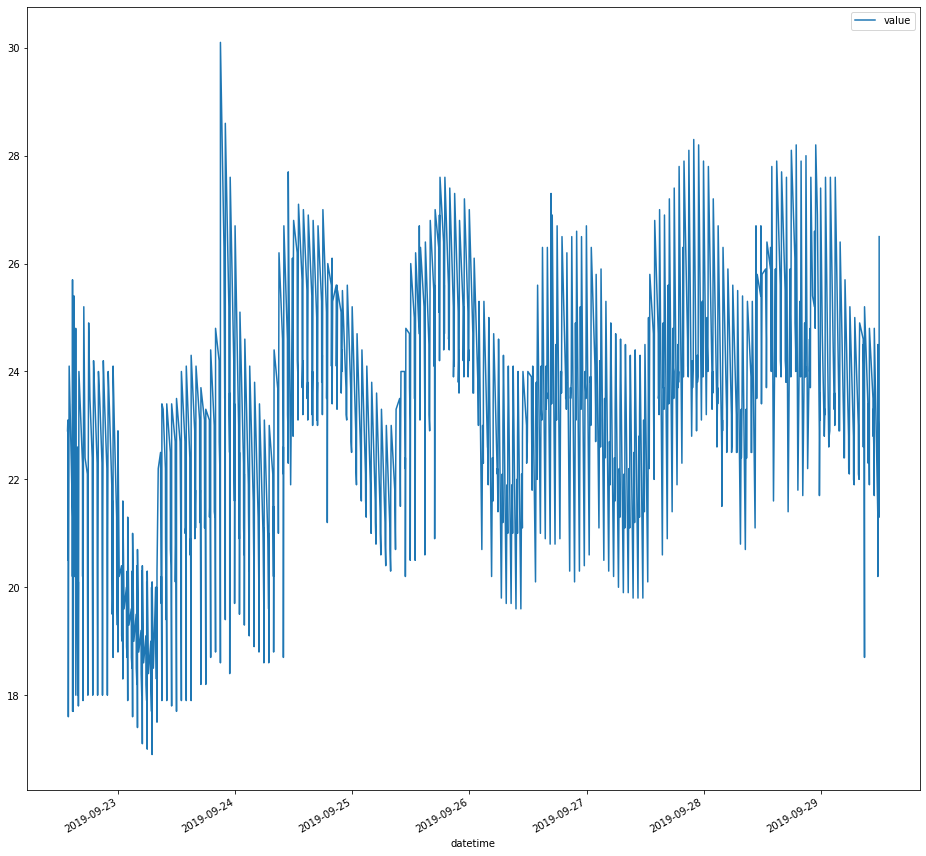

In [385]:
_ = optima_temp.plot(figsize=(16,16))

<AxesSubplot:xlabel='datetime'>

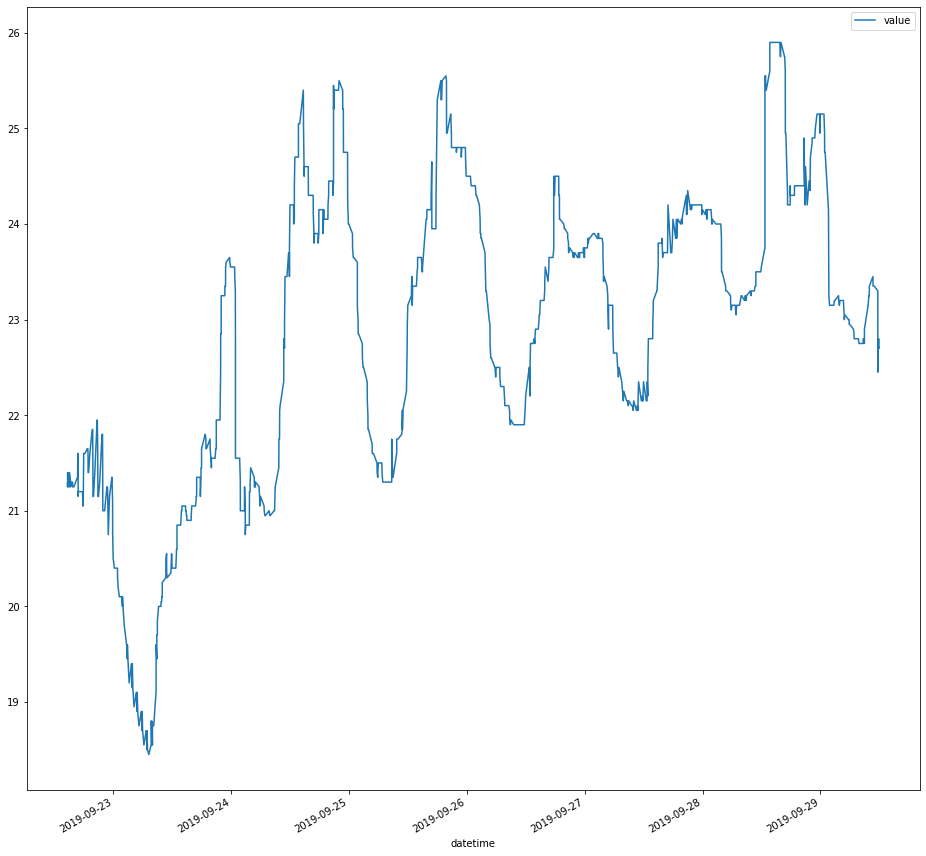

In [384]:
optima_temp.rolling(20).median().plot(figsize=(16,16))

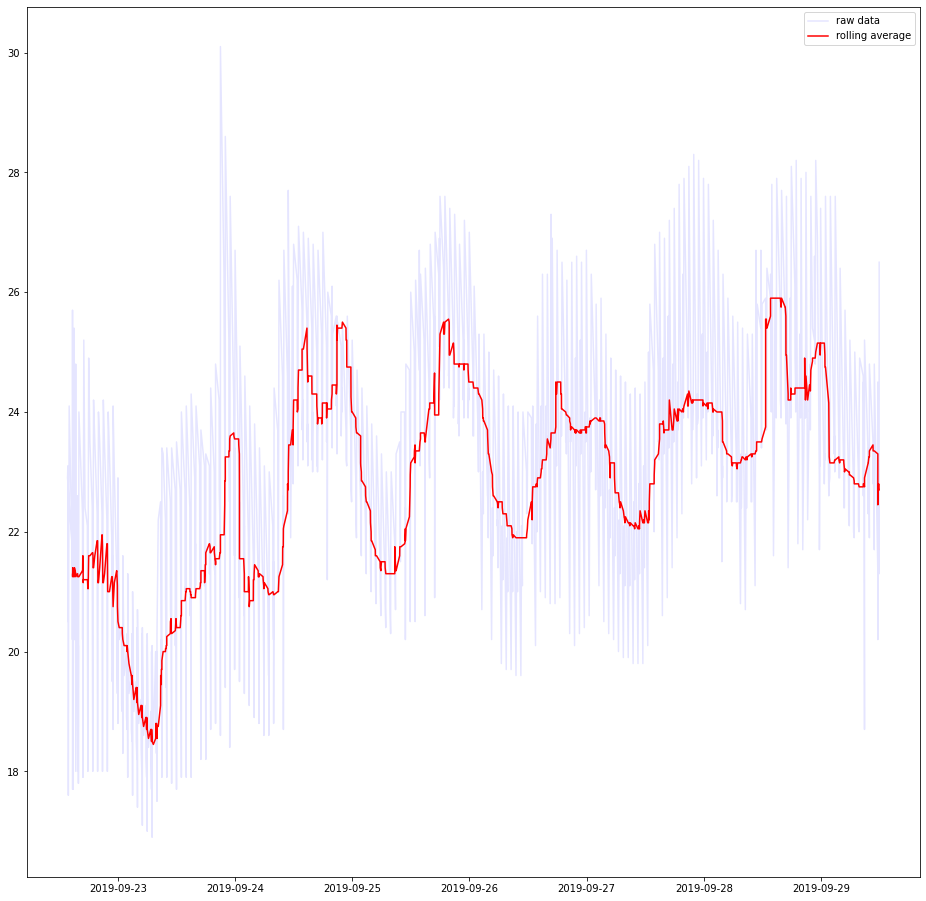

In [395]:
data = optima_temp

x1 = data.index
y1 = data['value'].values

x2 = data.index
y2 = data.rolling(20).median()

plt.figure(figsize=(16,16))
plt.plot(x1, y1, color='blue', alpha=0.1, label='raw data')
plt.plot(x2, y2, color='red', label='rolling average')
plt.legend()
plt.show()

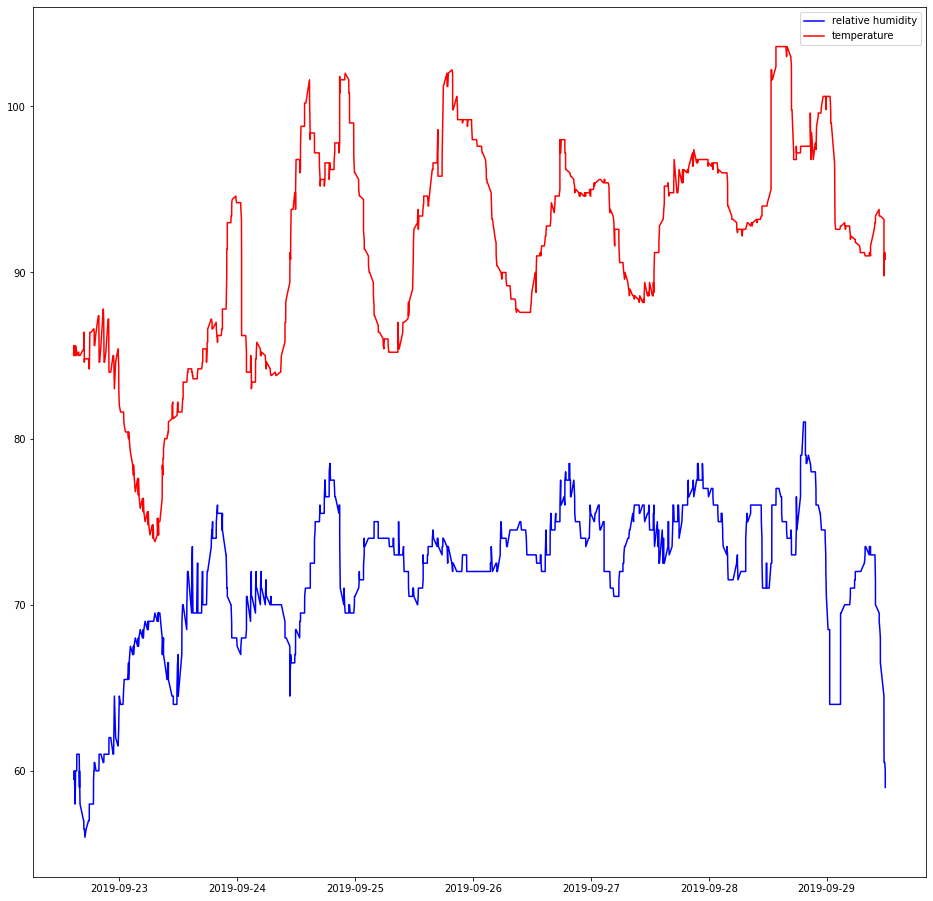

In [470]:
data = optima_rh

x1 = optima_rh.index
y1 = optima_rh.rolling(20).median()

x2 = optima_temp.index
y2 = optima_temp.rolling(20).median() * 4

plt.figure(figsize=(16,16))
plt.plot(x1, y1, color='blue', label='relative humidity')
plt.plot(x2, y2, color='red', label='temperature')
plt.legend()
plt.show()

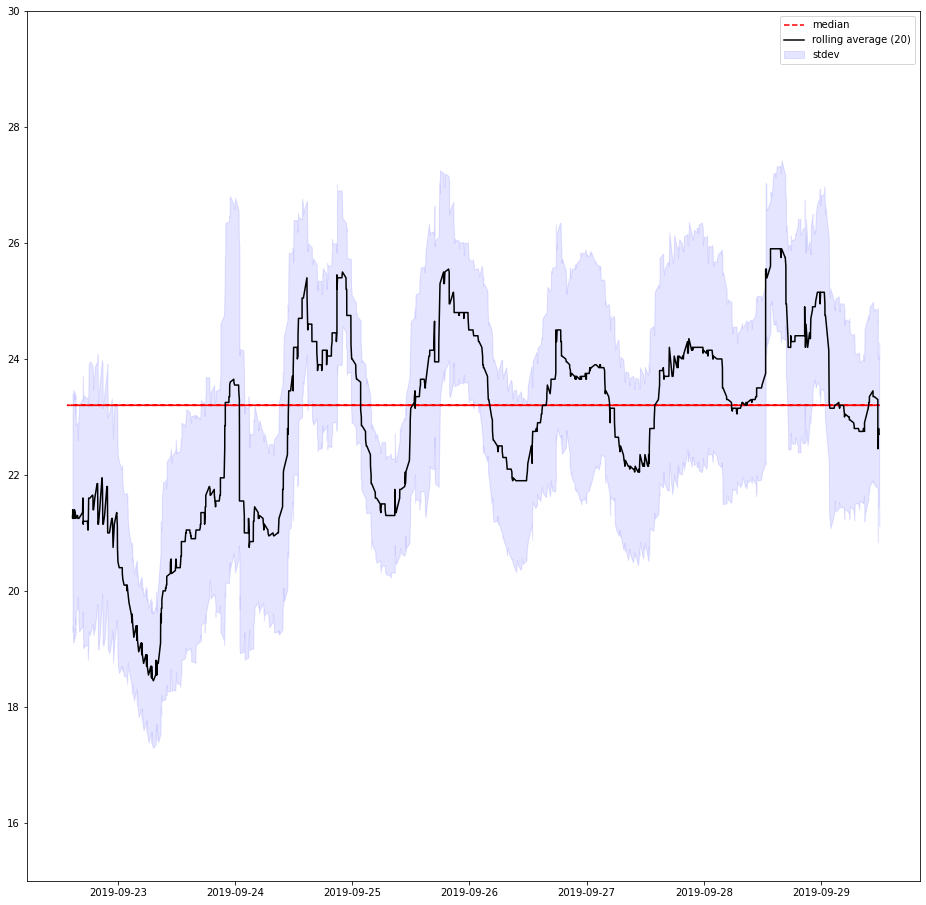

In [472]:
data = optima_temp['value']
median = data.rolling(20).median()
stdev = data.rolling(20).std()

plt.figure(figsize=(16,16))

plt.plot(
    data.index,
    [data.median()] * data.size,
    color='red',
    linestyle='--',
    label='median')

plt.plot(
    median.index,
    median.values,
    color='black',
    label='rolling average (20)')

plt.fill_between(
    x=stdev.index,
    y1=(median-stdev).values,
    y2=(median+stdev).values,
    color='blue',
    alpha=0.1,
    label='stdev')

plt.ylim([15, 30])
plt.legend()
plt.show()

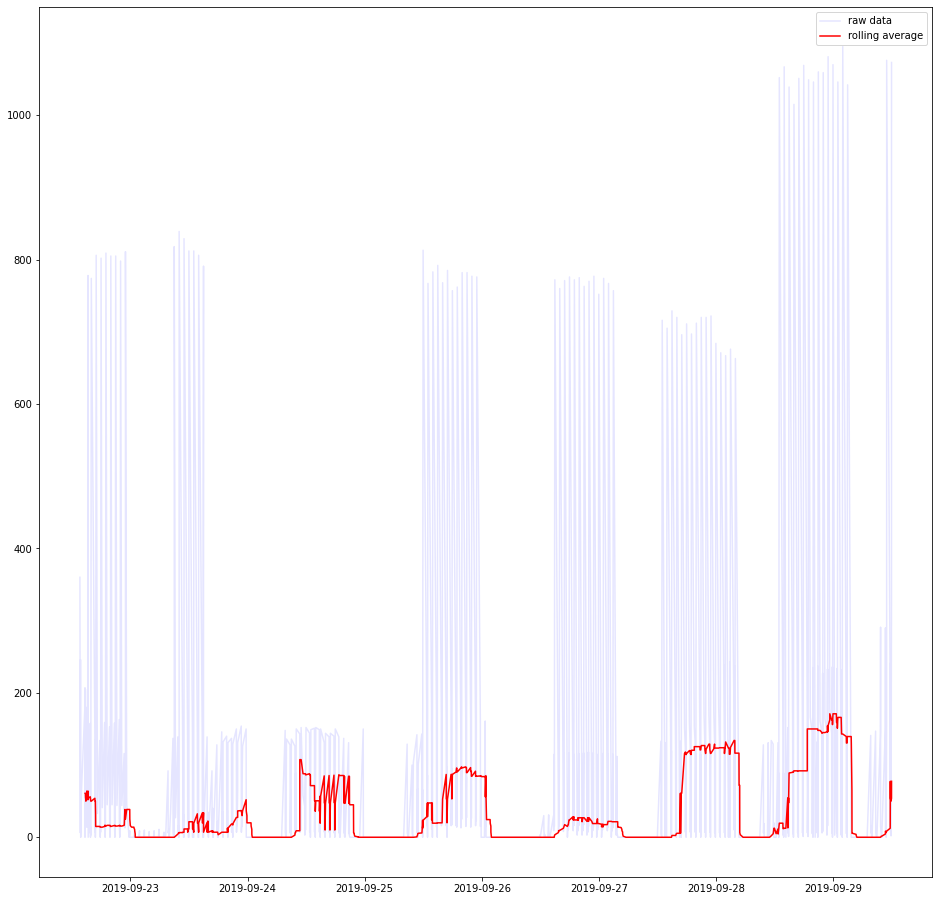

In [397]:
data = optima_lum

x1 = data.index
y1 = data['value'].values

x2 = data.index
y2 = data.rolling(20).median()

plt.figure(figsize=(16,16))
plt.plot(x1, y1, color='blue', alpha=0.1, label='raw data')
plt.plot(x2, y2, color='red', label='rolling average')
plt.legend()
plt.show()

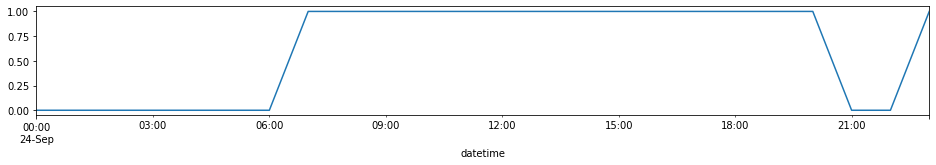

In [393]:
data = optima_lum
location = data['location'] == 'Kitchen Lab Table'
date = data['date'] == '2019-09-24'

activity = data.loc[location & date, 'value']
activity = activity.resample('H').median()
activity = np.sign(activity)

activity.plot(figsize=(16,2))
plt.show()

## Covid-19

|Date|Confirmed|Deaths|Recovered|
|-|-|-|-|
|2020-03-04|1|0|0|
|2020-03-05|1|0|0|
|2020-03-06|1|1|0|
|2020-03-07|2|1|1|
|2020-03-08|3|1|1|

In [325]:
CONFIRMED = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [326]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [367]:
def _get(name, df, country):
    """
    >>> c = _get('Confirmed', confirmed, 'Poland')
    >>> c.loc['2020-09-23']
    Confirmed    81673.0
    Name: 2020-09-23 00:00:00, dtype: float64
    """
    if country:
        df = df[df['Country/Region'] == country]
        
    data = df.transpose()[4:].sum(axis='columns')
    
    return pd.DataFrame(
        data=data.values,
        index=pd.to_datetime(data.index),
        columns=[name])
    
    
def covid19(country=None):
    """
    >>> poland = covid19('Poland')
    >>> poland.loc['2020-09-23']
    Confirmed    81673.0
    Deaths        2344.0
    Recovered    65561.0
    Name: 2020-09-23 00:00:00, dtype: float64
    
    >>> china = covid19('China')
    >>> china.loc['2020-09-23']
    Confirmed    90409.0
    Deaths        4738.0
    Recovered    85304.0
    Name: 2020-09-23 00:00:00, dtype: float64
    """
    return pd.concat((
        _get('Confirmed', confirmed, country),
        _get('Deaths', deaths, country),
        _get('Recovered', recovered, country)
    ), axis='columns')


def plot(df, kind='line', subplots=True, sharex=True, sharey=True, figsize=(16,16), logy=True, **kwargs):
    df.plot(kind=kind, subplots=subplots, sharex=sharex, sharey=sharey, figsize=figsize, logy=logy, **kwargs)


testmod()

TestResults(failed=0, attempted=6)

In [368]:
poland = covid19('Poland')
india = covid19('India')
russia = covid19('Russia')
usa = covid19('US')
china = covid19('China')
world = covid19()

In [336]:
world

,Confirmed,Deaths,Recovered
2020-01-22,555.0,17.0,28.0
2020-01-23,654.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1434.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-09-21,31320880.0,964746.0,21496061.0
2020-09-22,31517087.0,969541.0,21624434.0
2020-09-23,31779835.0,975104.0,21890442.0
2020-09-24,32141225.0,981808.0,22151303.0


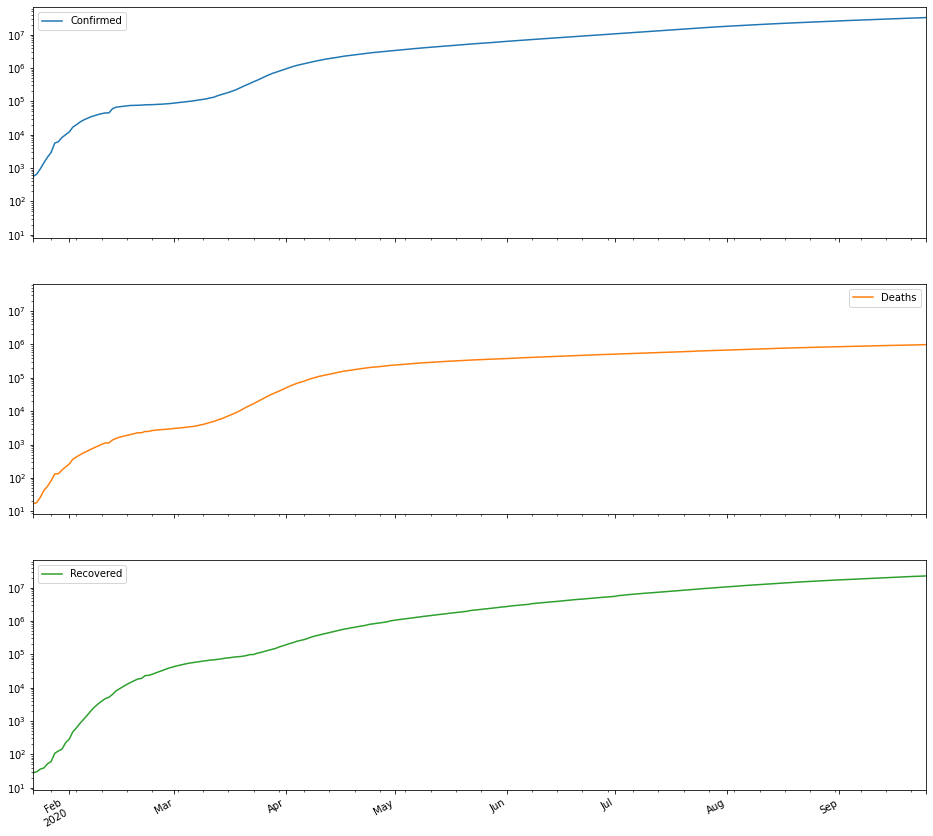

In [370]:
plot(world, kind='line')